<a href="https://colab.research.google.com/github/sboonpan/Project_MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Basic Library**

In [19]:
import time
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle as p

import tensorflow as tf
to_categorical = tf.keras.utils.to_categorical
mnist = tf.keras.datasets.mnist
load_medel = tf.keras.models.load_model
model_from_json = tf.keras.models.model_from_json

# **STEP 1 : Data Preparation**

กำหนดตัวแปรต่างที่จำเป็น

batch_size = จำนวนข้อมูล(แถว) ที่จะนำเข้าข้อมูลแต่ละครั้ง

num_classes = จำนวน output node ของ neural network หรือจำนวน class ที่ model จะทำนาย ได้แก่ class 0 จนถึง class 9

epochs = จำนวนรอบที่จะเทรนโมเดล โดยใน 1 รอบ หรือ 1 epoch เปรียบเทียบได้กับจำนวนข้อมูลจำนวน 128 ข้อมูล จำนวน 469 แถว จากข้อมูลทั้งหมด 60,000 แถว

img_rows, img_cols = ความสูงและความกว้างของภาพที่นำเข้าโมเดล



In [20]:
batch_size = 128
num_classes = 10
epochs = 5

img_rows, img_cols = 28, 28

In [21]:
# Download MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [22]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [23]:
print(y_train[0:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


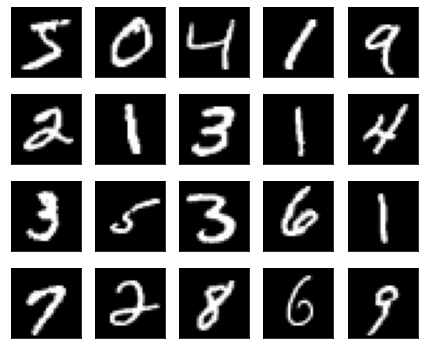

In [24]:
# plot รูปภาพเพื่อแสดงผล dataset

plt.figure(figsize = (6,5))

for i in range(20): 
  plt.subplot(4, 5, i+1)
  plt.imshow(x_train[i], cmap ='gray')
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()
plt.savefig('train_mnist.png', dpi = 300)


In [25]:
# แสดงค่าต่ำสุด-สูงสุดของ Pixel ของภาพ

x_train.min(), x_train.max()

(0, 255)

In [26]:
# จากภาพด้านบนจะแสดงภาพของตัวเลขแบบ Grayscale ทั้งหมด 20 ภาพ ที่เรียงตามลำดับใน Train Dataset 
# โดยแต่ละ pixel ของภาพแบบ Grayscale จะมีค่าความเข้มของสีดำตั้งแต่ 0 - 255 เรียงลำดับความเข้มจากมากไปน้อย
# โดยสีดำมีความเข้มเท่ากับ 0 และสีขาวมีความเข้มเท่ากับ 255

เพื่อที่จะนำภาพลายมือแบบ Grayscale เข้าโมเดล เราจะต้องเปลี่ยน Dimension ของ Dataset สำหรับการ Train และ Test จาก 60,000 x 28 x 28 และ 10,000 x 28 x 28 เป็น 60,000 x 28 x 28 x 1 และ 10,000 x 28 x 28 x 1 ตามลำดับ โดยตัวเลขในมิติที่ 2 - 4 ( 28 x 28 x 1 ) เป็นค่าที่เราจะกำหนดตอนนิยาม Model(input_shape) เพื่อให้ CNN มอง input Data เป็นภาพขนาด 28 x 28 แบบ 1 chanel(Grayscale) แต่ถ้าเราส่ง Input Data ที่เป็นภาพสี เราจะต้องนิยาม Model เพื่อให้ CNN มอง Input Data เป็นภาพขนาด 28 x 28 แบบ 3 Chanels ในระบบสีแบบ RGB แทน


In [27]:
tem_x_test = x_test

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test  = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

ถึงแม้ว่าเราจะสามารถนำภาพแบบ Grayscale ที่มีค่าของ Pixel เป็นจำนวนเต็มระหว่าง 0 - 255 เข้าโมเดลได้โดยตรง แต่ก็อาจทำให้ Train Model ได้ช้า รวมทั้งอาจส่งผลต่อประสิทธิภาพในการทำนาย ดังนั้นเราจึงต้องมีการ scaling เพื่อปรับค่าของ Pixel ให้เป็นตัวเลขทศนิยม ซึ่งเราจะใช้เทคนิคพื้นฐานในการทำ scaling ให้มีค่าระหว่าง 0 - 1 หารด้วย 255 

In [28]:
# Image Classification

x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [29]:
x_train.shape

(60000, 28, 28, 1)

In [30]:
x_test.shape

(10000, 28, 28, 1)

จากนี้เราจะเข้ารหัสผลเฉลยจากตัวเลข 0 - 9 ให้อยู่ในรูปของ One-Hot Encoder 

In [31]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [32]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# **STEP 2 : Define Model**

โดยทั่วไปโครงสร้างของ CNN จะประกอบด้วย 2 ส่วน คือ 

Feature Extraction เป็นส่วนที่ทำหน้าที่ในการสกัดเอา Feature ของรูปภาพ

Image Classification เป็นส่วนที่มีหน้าที่แยกประเภทรูปภาพ

## **CNN Model**

In [33]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Dropout(0.25))

# Image Classification
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

## **Step 3 : Compile**

In [34]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

# **Step 4 : Train Model(Fit)**

In [35]:
start = time.time()

his = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

done = time.time()
print('Total time', done - start)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2412 - accuracy: 0.9275 - val_loss: 0.0539 - val_accuracy: 0.9826
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0878 - accuracy: 0.9740 - val_loss: 0.0355 - val_accuracy: 0.9891
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0632 - accuracy: 0.9815 - val_loss: 0.0342 - val_accuracy: 0.9889
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0540 - accuracy: 0.9837 - val_loss: 0.0310 - val_accuracy: 0.9896
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0296 - val_accuracy: 0.9904
Total time 15.979028940200806
